# Kohenen Network

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as pit
import copy

## Input Studi_kasus_clustering_dg_Kohonen_Net.xlsx

In [ ]:
data = pd.read_excel("Studi_kasus_clustering_dg_Kohonen_Net.xlsx",skiprows=3)

In [3]:
train = data.copy()
train = train.drop(['No'],axis=1)
train = train.drop(['Cluster'],axis=1)

In [4]:
train

,X,Y
0,5,5
1,4,5
2,5,4
3,1,3
4,2,3
5,1,4
6,3,-4
7,2,-4
8,2,-3
9,2,4


### Deklarasi Kohenen

In [5]:
learning_rate = 0.6
faktor_penurunan = 0.5
R = 0.5
W = np.array([[1,3],[5,1],[-1,0]])

def hitung(temp,bobot):
    hasil = 0
    for t in range(len(bobot)) :
        hasil += np.power(temp[t]-bobot[t],2)
    return hasil

def ubah_bobot(temp,index):
    for i in range(len(temp)):
        W[index][i] = round(W[index][i] + learning_rate*(temp[i]-W[index][i]),3)

## Proses Learning

In [6]:
epoch = 1
stop = False
while not stop:
    S = []
    print("\nEpoch : ",epoch)
    for i in range(len(train['X'])):
        W_lama = copy.deepcopy(W)
        temp = np.array([train['X'][i],train['Y'][i]])
        D = []
        for x in range(len(W)):
            D.append(round(hitung(temp,W[x]),3))
        print("Input : ",temp,"\n\t --> D : ",D)
        ubah_bobot(temp,D.index(min(D)))
        print("\tBobot Baru : ",W)
        print("\tBobot Lama : ",W_lama)
        selisih = abs(W_lama-W)
        S.append(selisih)
    if(np.mean(S) < R):
            stop = True
    epoch += 1
    learning_rate = learning_rate*faktor_penurunan
print("STOP!!!! \nW = ",W)


Epoch :  1
Input :  [5 5] 
	 --> D :  [20, 16, 61]
	Bobot Baru :  [[ 1  3]
 [ 5  3]
 [-1  0]]
	Bobot Lama :  [[ 1  3]
 [ 5  1]
 [-1  0]]
Input :  [4 5] 
	 --> D :  [13, 5, 50]
	Bobot Baru :  [[ 1  3]
 [ 4  4]
 [-1  0]]
	Bobot Lama :  [[ 1  3]
 [ 5  3]
 [-1  0]]
Input :  [5 4] 
	 --> D :  [17, 1, 52]
	Bobot Baru :  [[ 1  3]
 [ 4  4]
 [-1  0]]
	Bobot Lama :  [[ 1  3]
 [ 4  4]
 [-1  0]]
Input :  [1 3] 
	 --> D :  [0, 10, 13]
	Bobot Baru :  [[ 1  3]
 [ 4  4]
 [-1  0]]
	Bobot Lama :  [[ 1  3]
 [ 4  4]
 [-1  0]]
Input :  [2 3] 
	 --> D :  [1, 5, 18]
	Bobot Baru :  [[ 1  3]
 [ 4  4]
 [-1  0]]
	Bobot Lama :  [[ 1  3]
 [ 4  4]
 [-1  0]]
Input :  [1 4] 
	 --> D :  [1, 9, 20]
	Bobot Baru :  [[ 1  3]
 [ 4  4]
 [-1  0]]
	Bobot Lama :  [[ 1  3]
 [ 4  4]
 [-1  0]]
Input :  [ 3 -4] 
	 --> D :  [53, 65, 32]
	Bobot Baru :  [[ 1  3]
 [ 4  4]
 [ 1 -2]]
	Bobot Lama :  [[ 1  3]
 [ 4  4]
 [-1  0]]
Input :  [ 2 -4] 
	 --> D :  [50, 68, 5]
	Bobot Baru :  [[ 1  3]
 [ 4  4]
 [ 1 -3]]
	Bobot Lama :  [[ 1  3]
 [ 

## Proses Testing

In [7]:
cluster = []
for i in range(len(train['X'])):
    temp = [train['X'][i],train['Y'][i]]
    D = []
    for x in range(len(W)):
        D.append(hitung(temp,W[x]))
    cluster.append(D.index(min(D)))
print("Cluster : ",cluster)

Cluster :  [1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 1, 2]


## Menyimpan Hasil Testing ke Data

In [8]:
train['Cluster'] = cluster

In [9]:
train

,X,Y,Cluster
0,5,5,1
1,4,5,1
2,5,4,1
3,1,3,0
4,2,3,0
5,1,4,0
6,3,-4,2
7,2,-4,2
8,2,-3,2
9,2,4,0


In [10]:
data

,No,X,Y,Cluster
0,1,5,5,1
1,2,4,5,1
2,3,5,4,1
3,4,1,3,2
4,5,2,3,2
5,6,1,4,2
6,7,3,-4,3
7,8,2,-4,3
8,9,2,-3,3
9,10,2,4,2


In [11]:
data["Hasil_Kohenen"] = cluster

In [12]:
data.loc[data['Hasil_Kohenen']==0]

,No,X,Y,Cluster,Hasil_Kohenen
3,4,1,3,2,0
4,5,2,3,2,0
5,6,1,4,2,0
9,10,2,4,2,0


In [13]:
data.loc[data['Hasil_Kohenen']==1]

,No,X,Y,Cluster,Hasil_Kohenen
0,1,5,5,1,1
1,2,4,5,1,1
2,3,5,4,1,1
10,11,4,4,1,1


In [14]:
data.loc[data['Hasil_Kohenen']==2]

,No,X,Y,Cluster,Hasil_Kohenen
6,7,3,-4,3,2
7,8,2,-4,3,2
8,9,2,-3,3,2
11,12,3,-3,3,2


## Visualiasi Data

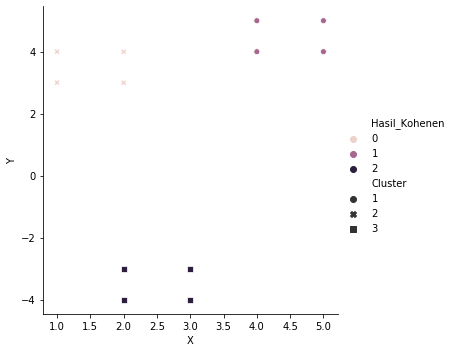

In [15]:
sns.relplot(data=data, x ='X',y = 'Y', hue = 'Hasil_Kohenen',style="Cluster")